<a href="https://colab.research.google.com/github/Cerasela-b/ml-product-category-classifier/blob/main/notebook/category_classifier_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and Inspecting the Dataset

In order to understand the data we need to explore its structure.

In this step, we will:

- Load the CSV file from the available source GitHub

- Check how many rows and columns the dataset contains

- Display the first few rows to get an initial view of the data

- Review the data types and basic metadata for each column

In [2]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/Cerasela-b/ml-product-category-classifier/main/data/products.csv"
df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

print("\nFirst 5 rows:")
print(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (35311, 8)

First 5 rows:
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2276-XC            860.0              2.5   
1   Mobile Phones    KA-2501-QO           3772.0              4.8   
2   Mobile Phones    FP-8086-IE           3092.0              3.9   
3   Mobile Phones    YI-0086-US            466.0              3.4   
4   Mobile Phones    NZ-3586-WP           4426.0              1.6   

   Listing Date    
0       5/10/2024  
1

### Observations

Here we see inconsisteny of column names, wee need to change that. We will have all column names written with upper first letter and we will remove `_` and spaces.


## Missing Values Check

Checking for missing values is essential because they can bias results or reduce model performance.

We will:

- Identify missing values – count missing entries per column.

- Analyze patterns – check if missingness is random or systematic.

- Decide handling strategy – impute, remove, or use models that handle missing data.
- Visualize missing values using a heatmap

Proper handling of missing values ensures reliable analysis and accurate conclusions.

In [3]:

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


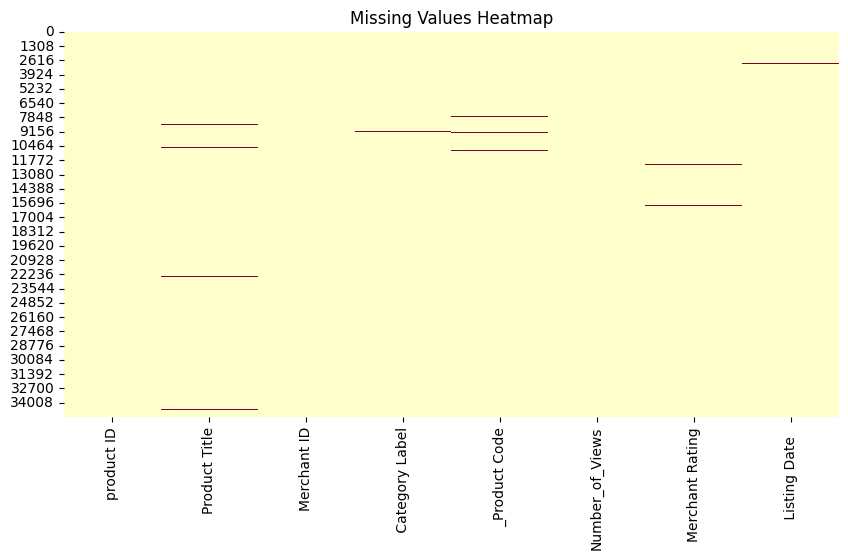

In [4]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap ="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()


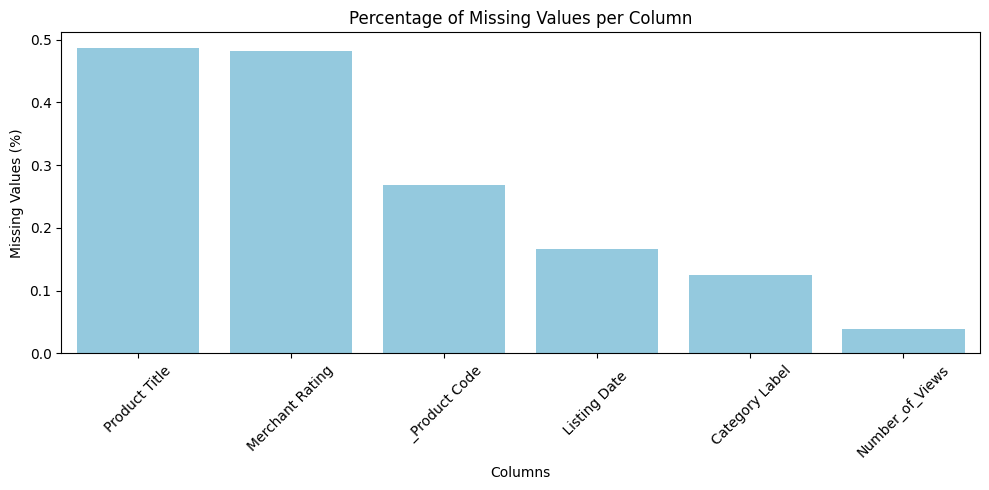

In [5]:
# Visualize missing data per column using barplot
missing_percent = df.isna().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=missing_percent.index, y=missing_percent.values, color="skyblue")
plt.xlabel("Columns")
plt.ylabel("Missing Values (%)")
plt.title("Percentage of Missing Values per Column")
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()

## Category analysis

In this step we will analize which category we have and if there are any inconsistensies in the category type


In [6]:
# Count occurrences of each category label
category_counts = df[' Category Label'].value_counts()

# Print counts
print("Category distribution (counts):")
print(category_counts)

Category distribution (counts):
 Category Label
Fridge Freezers     5495
Washing Machines    4036
Mobile Phones       4020
CPUs                3771
TVs                 3564
Fridges             3457
Dishwashers         3418
Digital Cameras     2696
Microwaves          2338
Freezers            2210
fridge               123
CPU                   84
Mobile Phone          55
Name: count, dtype: int64


## Exploring the `Product Title` column

The `Product Title` column is one of the key textual features that will be used to train the model.
Before using it, we need to ensure that the data is clean, consistent, and ready for modeling.

In this section, we will:

- Examine the data type of the `Product Title` column,

- Preview a few sample titles to understand the structure of the text,

- Identify common patterns and inconsistencies in naming (e.g., color variations, spacing, extra codes),

- Detect potential noise such as unnecessary symbols, model numbers, or language mix-ups,

- Prepare the text for cleaning and normalization to ensure consistency before model training.

In [7]:
# 1. Check the data type of the 'Product Title' column
print("Data type of Product Title column:", df['Product Title'].dtype)

# 2. Display the first 20 values from the column
print("\nFirst 20 values in Product Title column:")
print(df['Product Title'].head(20))

# 3. Show the 20 most frequent values in the column
print("\nTop 20 most frequent values in Product Title column:")
print(df['Product Title'].value_counts().head(20))

# 4. Basic text length analysis
print("\n Text length statistics:")
print(df['Product Title'].str.len().describe())

Data type of Product Title column: object

First 20 values in Product Title column:
0                       apple iphone 8 plus 64gb silver
1                   apple iphone 8 plus 64 gb spacegrau
2     apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...
3                   apple iphone 8 plus 64gb space grey
4     apple iphone 8 plus gold 5.5 64gb 4g unlocked ...
5     apple iphone 8 plus gold 5.5 64gb 4g unlocked ...
6                  apple iphone 8 plus 64 gb space grey
7                   apple iphone 8 plus 64gb space grey
8                   apple iphone 8 plus 64gb space grey
9                   apple iphone 8 plus 64gb space grey
10    apple iphone 8 plus 5.5 single sim 4g 64gb silver
11      sim free iphone 8 plus 64gb by apple space grey
12             apple iphone 8 plus 64gb gold smartphone
13      apple iphone 8 plus 5.5 single sim 4g 64gb grey
14    apple iphone 8 plus silver 5.5 64gb 4g unlocke...
15                     apple iphone 8 plus 64 gb silver
16             apple

## Standardizing the column names

In this step, we will clean and standardize the column names to make them more consistent and readable.
We will:

- Remove unnecessary spaces at the beginning or end of the column names,

- Replace underscores (_) with spaces,

- Capitalize each word.

This will make the dataset easier to read and work with in later analysis steps.

In [8]:
# Standardize column names

import re

def clean_column_name(col):
    col = col.strip()                     # remove leading/trailing spaces
    col = col.replace('_', ' ')           # replace underscores with spaces
    # Insert space before a capital letter if previous is lowercase
    col = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', col)
    col = re.sub(r'\s+', ' ', col)       # replace multiple spaces with single
    col = col.title()                     # capitalize each word
    col = col.replace('Id', 'ID')         # keep 'ID' uppercase
    return col

df.columns = [clean_column_name(c) for c in df.columns]
# Preview the cleaned column names
print("Cleaned column names:")
print(df.columns.tolist())


Cleaned column names:
['Product ID', 'Product Title', 'Merchant ID', 'Category Label', ' Product Code', 'Number Of Views', 'Merchant Rating', 'Listing Date']


## Removing Missing Values

During the initial inspection, we noticed that some columns contain missing values.
Missing data can cause problems during model training, potentially leading to errors or biased results.

In this step, we will:

- Remove rows that contain missing values,

- Check the new shape of the dataset after cleaning.

This ensures that our dataset is complete and ready for further analysis and model training.

In [9]:
# Before removing missing values
print("Shape before removing missing values:", df.shape)

# Remove rows with any missing values
df = df.dropna()

# After removing missing values
print("Shape after removing missing values:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())


Shape before removing missing values: (35311, 8)
Shape after removing missing values: (34760, 8)
Missing values per column:
Product ID         0
Product Title      0
Merchant ID        0
Category Label     0
 Product Code      0
Number Of Views    0
Merchant Rating    0
Listing Date       0
dtype: int64


## Standardizing `Category Label`

In the previous step, we observed that the `Category Label` column contains inconsistent category names.
For example:

- fridge vs Fridges vs Fridge Freezers

- Mobile Phone vs Mobile Phones

- CPU vs CPUs

These inconsistencies can cause issues during analysis or modeling, such as splitting similar products into separate groups.

In this step, we will:

- Map similar categories to a single standard name (e.g., fridge → Fridges, CPU → CPUs).

- Remove extra spaces and apply consistent capitalization.

- Verify the cleaned category distribution to ensure all categories are standardized.
- Visualize the categories after cleaning

This ensures that our category data is clean, consistent, and ready for analysis or model training.

In [18]:
# Define a mapping to standardize categories
category_mapping = {
    'fridge': 'Fridges',
    'Fridge Freezers': 'Fridge Freezers',
    'Fridges': 'Fridge Freezers',
    'Mobile Phone': 'Mobile Phones',
    'CPUs': 'CPUs',
    'CPU': 'CPUs',
    # Add more mappings if needed
}

# Apply the mapping
df['Category Label'] = df['Category Label'].replace(category_mapping)

# Strip extra spaces and capitalize consistently
df['Category Label'] = df['Category Label'].str.strip().str.title()

# Convert column type to 'category'
df['Category Label'] = df['Category Label'].astype('category')
print("Category Label type after converting:",df['Category Label'].dtype)


# View the cleaned category distribution
print("\nCategory distribution after cleaning:")
print(df['Category Label'].value_counts())

Category Label type after converting: category

Category distribution after cleaning:
Category Label
Fridge Freezers     8948
Mobile Phones       4023
Washing Machines    3971
Cpus                3792
Tvs                 3502
Dishwashers         3374
Digital Cameras     2661
Microwaves          2307
Freezers            2182
Name: count, dtype: int64


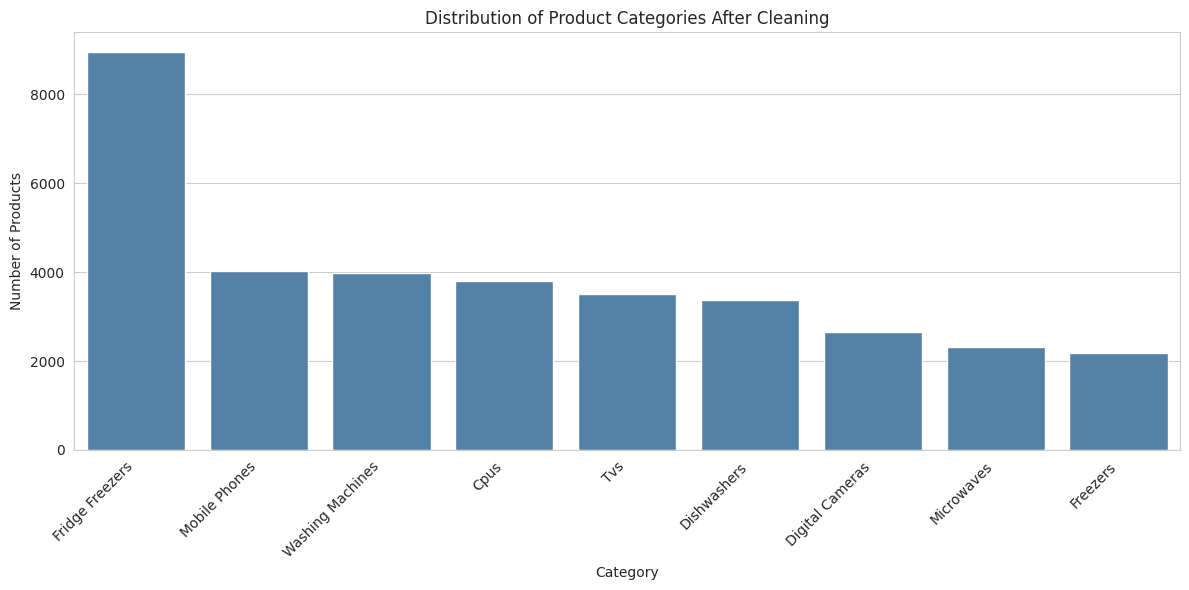

In [34]:
# Calculate category counts
category_counts = df['Category Label'].value_counts()

# Set plot style
sns.set_style("whitegrid")

# Create the bar plot with explicit order
plt.figure(figsize=(12,6))
sns.barplot(
    x=category_counts.index,
    y=category_counts.values,
    color="steelblue",
    order=category_counts.sort_values(ascending=False).index  # force descending order
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Products")
plt.xlabel("Category")
plt.title("Distribution of Product Categories After Cleaning")
plt.tight_layout()
plt.show()



## **Product Title** Cleaning and Standardization

In this step, we cleaned and standardized the `Product Title` column to ensure consistency and prepare the text data for modeling.
Product titles often contain inconsistent formatting, special characters, extra spaces, and unnecessary codes — all of which can negatively impact text-based models.

Steps Performed:

- Copied the original dataset to keep the raw data intact for reference.

- Converted all text to lowercase to eliminate case sensitivity issues.

- Removed leading, trailing, and multiple spaces to normalize spacing between words.

- Removed special characters (e.g., /, -, ,, (), etc.), keeping only letters, numbers, and spaces.

- Standardized common expressions such as:

  - "spacegrey" → "space grey"

  - "64 gb" → "64gb"

  - "128 gb" → "128gb"


- Removed product codes and identifiers (e.g., mq8n2b/a) using regex patterns.

- Cleaned up any leftover multiple spaces after replacements.

- Ensured no titles start with spaces by applying a final lstrip() cleanup.

- Removed empty titles, if any, to avoid null or meaningless entries.

- Verified the results by printing the first 20 cleaned titles and checking that none start with spaces.


The `Product Title` column is now fully standardized — clean, lowercase, space-normalized, and ready for text vectorization.


In [13]:
# Make a copy to keep original data safe
df_clean = df.copy()

# Lowercase all text
df_clean['Product Title'] = df_clean['Product Title'].str.lower()

# Remove leading/trailing spaces and multiple spaces
df_clean['Product Title'] = df_clean['Product Title'].str.strip()      # leading/trailing
df_clean['Product Title'] = df_clean['Product Title'].str.replace(r'\s+', ' ', regex=True)  # multiple spaces

# Remove special characters (keep letters, numbers, spaces)
df_clean['Product Title'] = df_clean['Product Title'].str.replace(r'[^a-z0-9\s]', '', regex=True)

# Standardize common terms
df_clean['Product Title'] = df_clean['Product Title'].str.replace('spacegrey', 'space grey')
df_clean['Product Title'] = df_clean['Product Title'].str.replace('64 gb', '64gb')
df_clean['Product Title'] = df_clean['Product Title'].str.replace('128 gb', '128gb')
# Add more replacements as needed

# Optional: remove technical codes like mq8n2b/a
df_clean['Product Title'] = df_clean['Product Title'].str.replace(r'\b[a-z0-9]{4,}/[a-z0-9]{1,}\b', '', regex=True)

# Remove extra spaces again after replacements
df_clean['Product Title'] = df_clean['Product Title'].str.replace(r'\s+', ' ', regex=True)

# Remove any remaining leading spaces (safe step)
df_clean['Product Title'] = df_clean['Product Title'].str.lstrip()

# Remove empty titles
df_clean = df_clean[df_clean['Product Title'].str.strip() != ""]

# Count how many titles start with a space
print("Titles starting with space:", df_clean['Product Title'].str.startswith(' ').sum())

# Show examples if any
df_clean[df_clean['Product Title'].str.startswith(' ')].head()

# Preview cleaned Product Titles
for i, title in enumerate(df_clean['Product Title'].head(20)):
    print(f"{i:<3} | {title}")



Titles starting with space: 0
0   | apple iphone 8 plus 64gb silver
1   | apple iphone 8 plus 64gb spacegrau
2   | apple mq8n2ba iphone 8 plus 64gb 55 12mp sim free smartphone in gold
3   | apple iphone 8 plus 64gb space grey
4   | apple iphone 8 plus gold 55 64gb 4g unlocked sim free
5   | apple iphone 8 plus gold 55 64gb 4g unlocked sim free
6   | apple iphone 8 plus 64gb space grey
7   | apple iphone 8 plus 64gb space grey
8   | apple iphone 8 plus 64gb space grey
9   | apple iphone 8 plus 64gb space grey
10  | apple iphone 8 plus 55 single sim 4g 64gb silver
11  | sim free iphone 8 plus 64gb by apple space grey
12  | apple iphone 8 plus 64gb gold smartphone
13  | apple iphone 8 plus 55 single sim 4g 64gb grey
14  | apple iphone 8 plus silver 55 64gb 4g unlocked sim free
15  | apple iphone 8 plus 64gb silver
16  | apple iphone 8 plus 64gb silver unlocked
17  | apple iphone 8 plus 14 cm 55 64gb 12 mp ios 11 silver
18  | iphone 8 plus sim free water dust resistant 64gb silver by apple

## Removing irrelevant columns

Since our goal is to build a model that classifies products based on their titles,
we will keep only the following columns:

- **Product Title** – the text input used for training the model

- **Category Label** – the target variable we want to predict

All other columns (e.g., product or merchant identifiers, ratings, listing dates) do not contribute to this task and will be removed to simplify the dataset.

In [21]:
# Keep only relevant columns
df_model = df_clean[['Product Title', 'Category Label']].copy()

# Check the new shape
print("Dataset shape after column selection:", df_model.shape)
df_model.head(20)


Dataset shape after column selection: (34760, 2)


,Product Title,Category Label
0,apple iphone 8 plus 64gb silver,Mobile Phones
1,apple iphone 8 plus 64 gb spacegrau,Mobile Phones
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,Mobile Phones
3,apple iphone 8 plus 64gb space grey,Mobile Phones
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Mobile Phones
5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Mobile Phones
6,apple iphone 8 plus 64 gb space grey,Mobile Phones
7,apple iphone 8 plus 64gb space grey,Mobile Phones
8,apple iphone 8 plus 64gb space grey,Mobile Phones
9,apple iphone 8 plus 64gb space grey,Mobile Phones


## Creating a new feature - `Product Title Length`

In this step, we create a **numeric feature** called `Product Title Length`, which measures the **number of characters** in each product title.

**Why this is useful**:

- Title length can be an **informative feature**, as some categories may tend to have longer or shorter titles.

- It allows the model to capture patterns related to the verbosity or structure of the product description.

- This feature can also be used for **visual analysis**, helping us understand differences between product categories before modeling.

**Next Steps**:

- Compute `Product Title Length` using the `.str.len()` method.

- Visualize the distribution of title lengths for each `Category Label` to spot trends or differences across categories.

Product Title Length summary:
count    34760.000000
mean        52.972066
std         22.417916
min          5.000000
25%         39.000000
50%         52.000000
75%         65.000000
max        200.000000
Name: Product Title Length, dtype: float64
Product Title Length statistics by category:
                   count       mean        std   min   25%   50%   75%    max
Category Label                                                               
Cpus              3792.0  67.016350  20.259078  11.0  55.0  65.0  76.0  190.0
Digital Cameras   2661.0  50.118001  24.512564   6.0  34.0  44.0  61.0  180.0
Dishwashers       3374.0  50.184351  17.939197  10.0  39.0  51.0  61.0  192.0
Freezers          2182.0  48.705775  18.132038  10.0  37.0  47.0  60.0  168.0
Fridge Freezers   8948.0  52.600134  19.934237   8.0  40.0  51.0  66.0  173.0
Microwaves        2307.0  51.788903  18.850512  11.0  39.0  52.0  65.0  164.0
Mobile Phones     4023.0  46.155108  30.651590   5.0  26.0  40.0  57.0  200.0
Tvs 

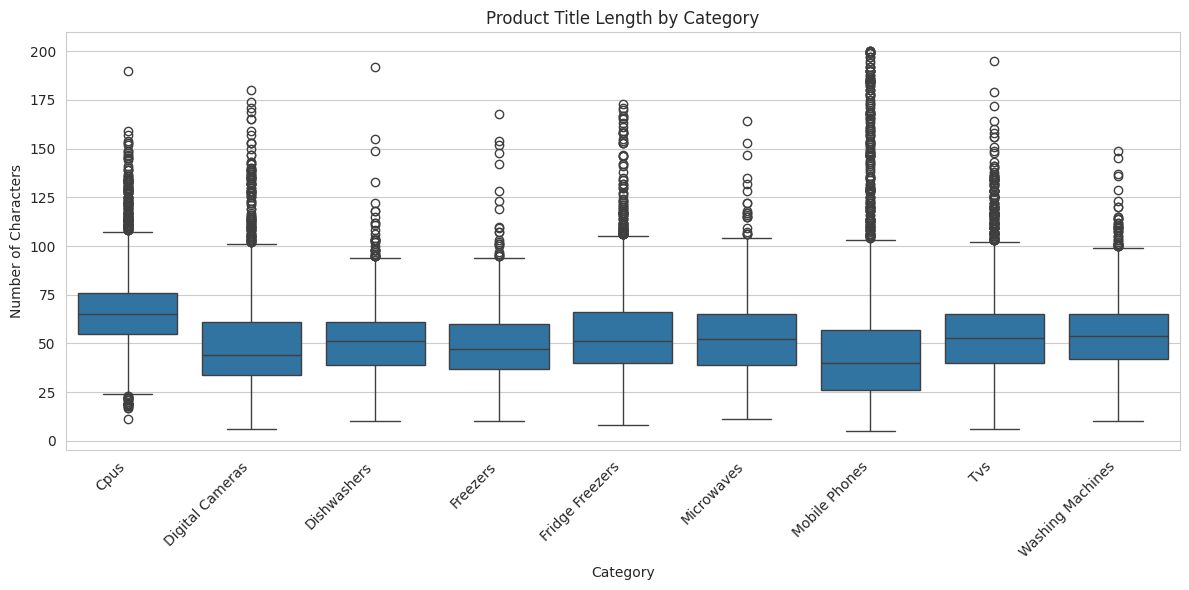

In [24]:
# Create the new feature: number of characters in each title
df_model['Product Title Length'] = df_model['Product Title'].str.len()

# Show basic stats
print("Product Title Length summary:")
print(df_model['Product Title Length'].describe())

# Group by Category Label and describe Product Title Length
print("Product Title Length statistics by category:")
print(df_model.groupby('Category Label', observed=False)['Product Title Length'].describe())

# Visualize the distribution of title lengths across categories
plt.figure(figsize=(12,6))
sns.boxplot(x='Category Label', y='Product Title Length', data=df_model)
plt.xticks(rotation=45, ha='right')
plt.title('Product Title Length by Category')
plt.ylabel('Number of Characters')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

## Training and Comparing Multiple Machine Learning Models

We will train and evaluate several machine learning models to find the best one for **classifying products based on their titles**.

The process will include the following steps:

- **Split the dataset** into training and test sets.

- **Prepare the data by**:

  - Transforming the `Product Title` column using **TF-IDF vectorization** to convert text into numerical features,

  - Optionally including the `Product Title Length` as a numeric feature and scaling it using **MinMaxScaler**.

- **Use a ColumnTransformer** to combine text and numeric features into a single input matrix for the models.

- **Define and train multiple classification algorithms**, such as:

  - Logistic Regression,

  - Random Forest,

  - Gradient Boosting,

  - Support Vector Machine,

   - K-Nearest Neighbors.

- **Wrap all components into a unified pipeline** for each model, ensuring consistent preprocessing and training.

- **Evaluate model performance** using classification metrics such as accuracy, precision, recall, and F1-score.

By the end of this process, we will be able to **compare the strengths and weaknesses** of each algorithm and select the most suitable model for predicting product categories from their titles.


Logistic Regression
                  precision    recall  f1-score   support

            Cpus       1.00      0.99      1.00       758
 Digital Cameras       1.00      0.99      0.99       532
     Dishwashers       0.96      0.93      0.94       675
        Freezers       0.99      0.89      0.93       436
 Fridge Freezers       0.91      0.99      0.95      1790
      Microwaves       1.00      0.94      0.97       461
   Mobile Phones       0.98      0.99      0.99       805
             Tvs       0.98      0.97      0.97       701
Washing Machines       0.98      0.92      0.95       794

        accuracy                           0.96      6952
       macro avg       0.98      0.96      0.97      6952
    weighted avg       0.97      0.96      0.96      6952



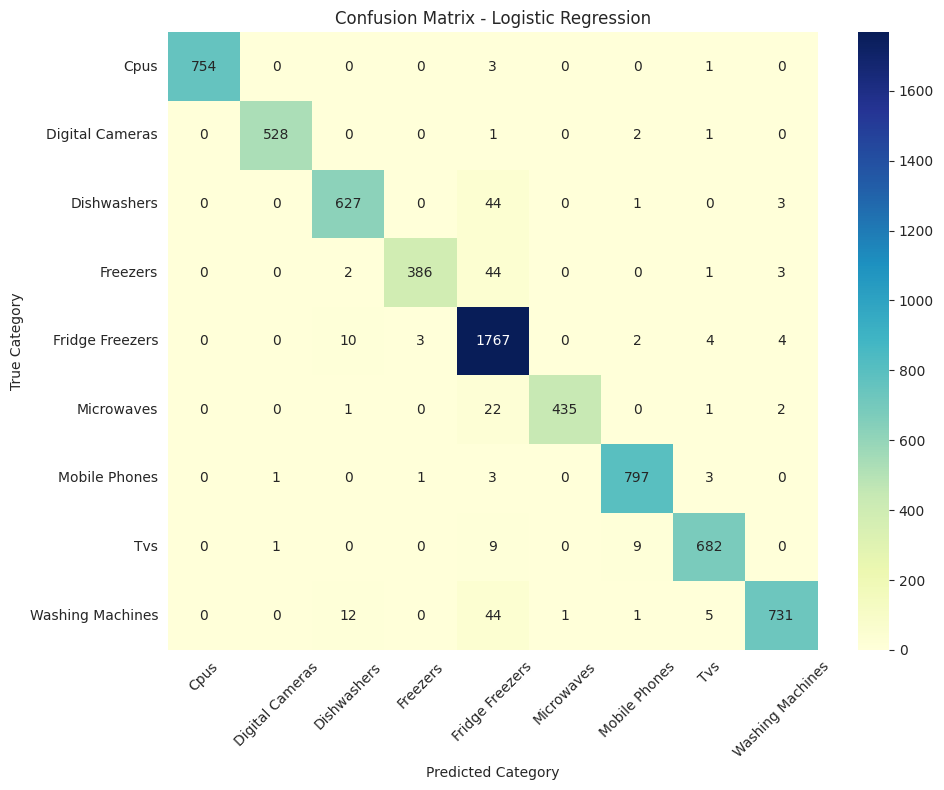


Random Forest
                  precision    recall  f1-score   support

            Cpus       1.00      1.00      1.00       758
 Digital Cameras       1.00      0.99      0.99       532
     Dishwashers       0.96      0.96      0.96       675
        Freezers       0.99      0.90      0.94       436
 Fridge Freezers       0.94      0.98      0.96      1790
      Microwaves       0.99      0.97      0.98       461
   Mobile Phones       0.99      0.99      0.99       805
             Tvs       0.99      0.99      0.99       701
Washing Machines       0.97      0.95      0.96       794

        accuracy                           0.97      6952
       macro avg       0.98      0.97      0.98      6952
    weighted avg       0.97      0.97      0.97      6952



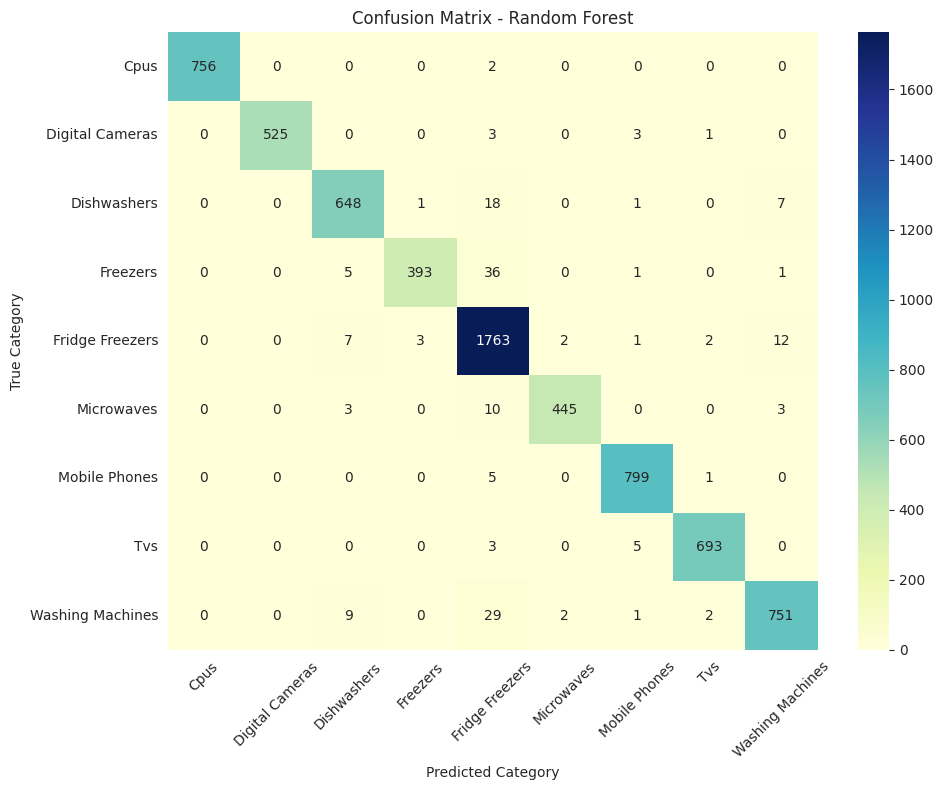


Gradient Boosting
                  precision    recall  f1-score   support

            Cpus       1.00      0.99      1.00       758
 Digital Cameras       1.00      0.97      0.98       532
     Dishwashers       0.98      0.94      0.96       675
        Freezers       0.98      0.89      0.93       436
 Fridge Freezers       0.88      0.99      0.93      1790
      Microwaves       1.00      0.93      0.96       461
   Mobile Phones       0.98      0.96      0.97       805
             Tvs       0.99      0.95      0.97       701
Washing Machines       1.00      0.92      0.96       794

        accuracy                           0.96      6952
       macro avg       0.98      0.95      0.96      6952
    weighted avg       0.96      0.96      0.96      6952



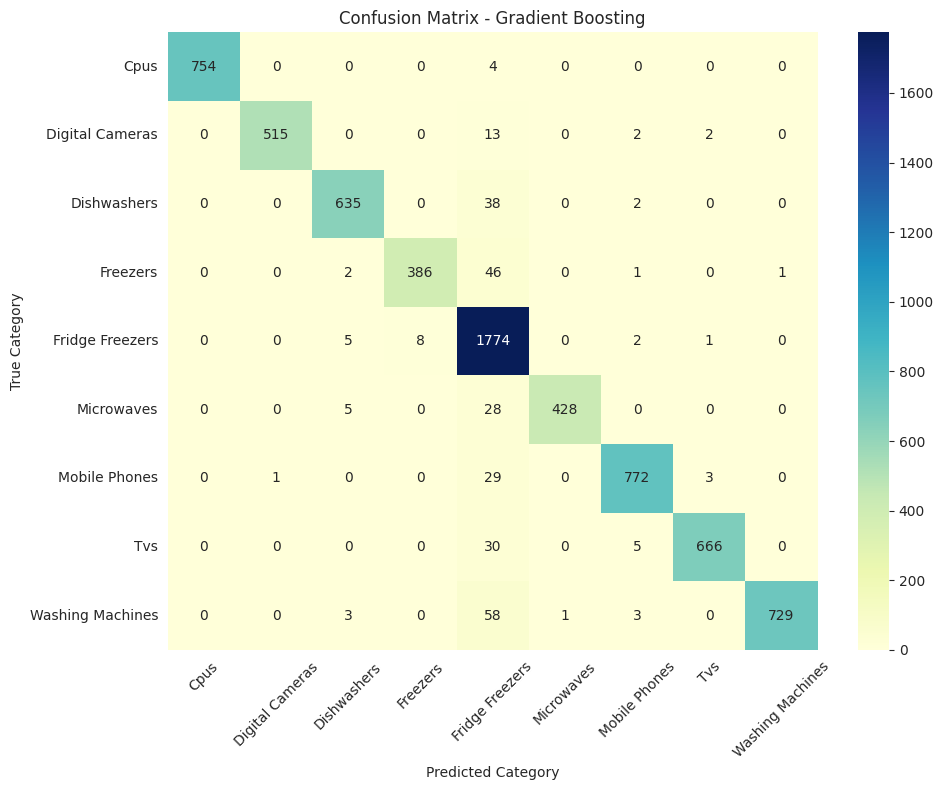


Support Vector Machine
                  precision    recall  f1-score   support

            Cpus       1.00      1.00      1.00       758
 Digital Cameras       0.99      1.00      1.00       532
     Dishwashers       0.95      0.94      0.95       675
        Freezers       0.99      0.93      0.96       436
 Fridge Freezers       0.94      0.99      0.96      1790
      Microwaves       1.00      0.96      0.98       461
   Mobile Phones       0.99      0.99      0.99       805
             Tvs       0.98      0.99      0.99       701
Washing Machines       0.98      0.94      0.96       794

        accuracy                           0.97      6952
       macro avg       0.98      0.97      0.98      6952
    weighted avg       0.97      0.97      0.97      6952



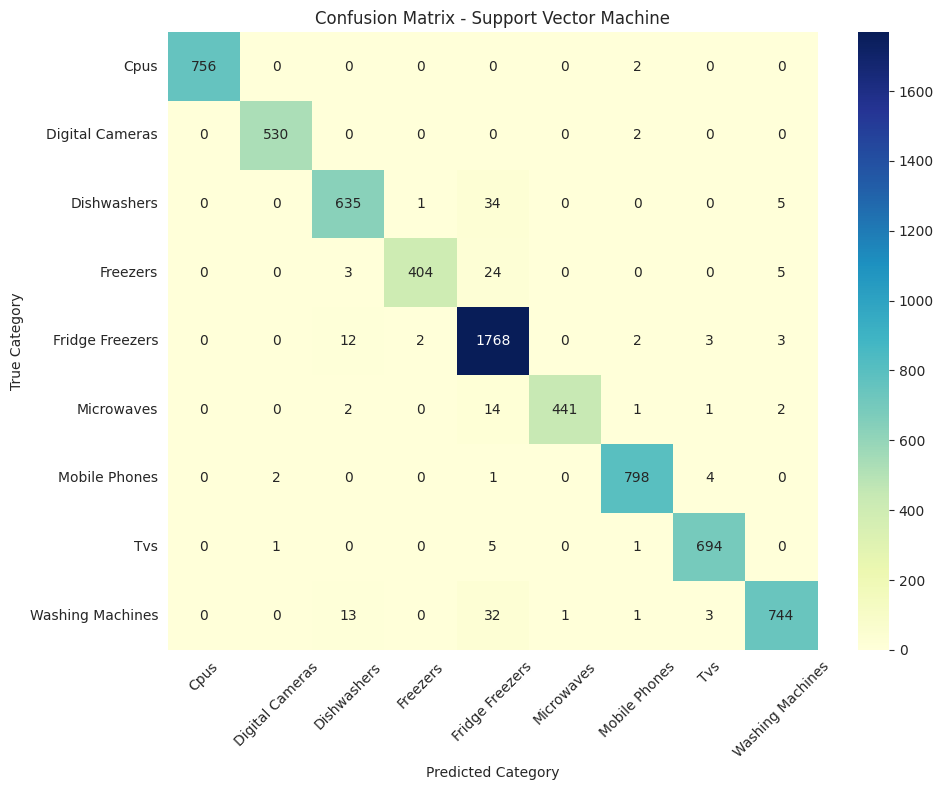


K-Nearest Neighbors
                  precision    recall  f1-score   support

            Cpus       1.00      1.00      1.00       758
 Digital Cameras       0.98      1.00      0.99       532
     Dishwashers       0.89      0.97      0.93       675
        Freezers       0.84      0.79      0.82       436
 Fridge Freezers       0.95      0.95      0.95      1790
      Microwaves       0.99      0.97      0.98       461
   Mobile Phones       0.99      0.98      0.99       805
             Tvs       0.98      1.00      0.99       701
Washing Machines       0.98      0.94      0.96       794

        accuracy                           0.96      6952
       macro avg       0.96      0.95      0.96      6952
    weighted avg       0.96      0.96      0.96      6952



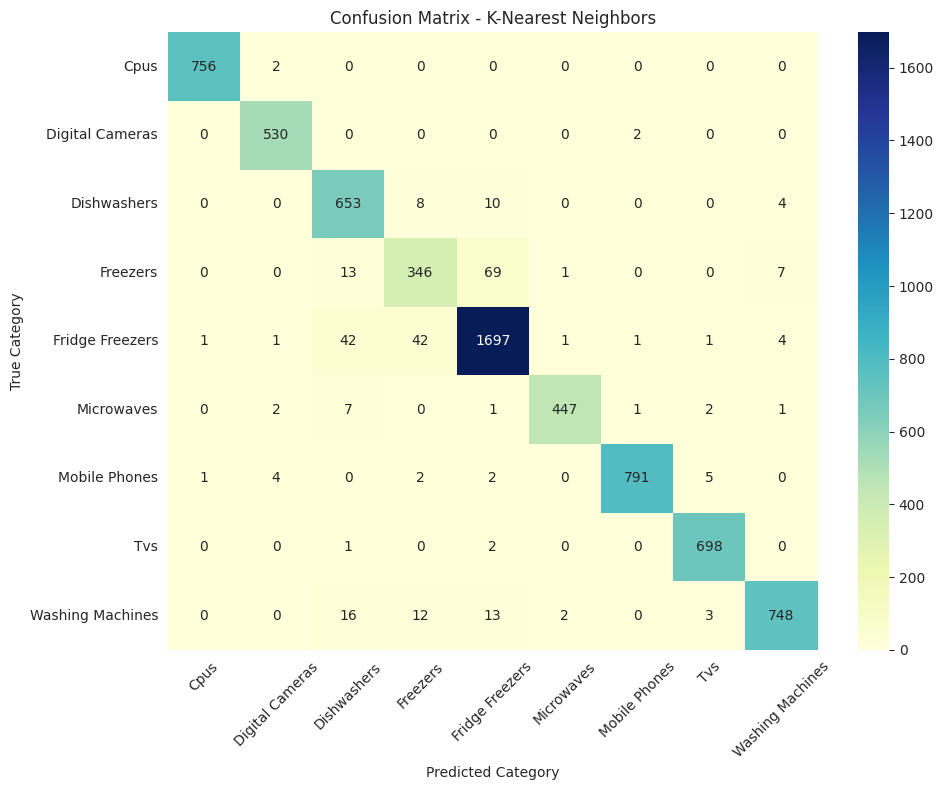

In [37]:
# Core ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Features and label
X = df_model[['Product Title', 'Product Title Length']]
y = df_model['Category Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessor: TF-IDF for text, MinMaxScaler for numeric feature
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(), "Product Title"),
        ("length", MinMaxScaler(), ["Product Title Length"])
    ]
)

# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": LinearSVC(max_iter=10000),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate
for name, model in models.items():
    print(f"\n{name}")
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)

    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=pipeline.classes_,
                yticklabels=pipeline.classes_)
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category")
    plt.title(f"Confusion Matrix - {name}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Conclusion and Model Selection

Based on the evaluation of multiple classifiers, we can summarize the results as follows:

- **Random Forest** and **Support Vector Machine (LinearSVC)** achieved the highest accuracy (0.97) and consistently strong performance across all product categories.

- **Logistic Regression** and **Gradient Boosting** also performed well (accuracy ~0.96) but showed slightly lower recall on certain categories like `Freezers`.

- **K-Nearest Neighbors** performed reasonably (accuracy 0.96) but struggled with some categories and may be slower on large datasets.

**Decision**:
We will select **Random Forest** as our primary model for training and deployment.

- It handles non-linear patterns well, is robust to noisy features, and provides excellent overall performance on both common and less frequent categories.